# Homework 02: Data Visualization and Data Wrangling 
***

**Name**: 

***

This assignment is due on Canvas by **6:00PM on Friday September 9**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

As always, you should import Pandas and NumPy when you start working with data.

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np


In this homework you will also be creating some graphs. Therefore, lets also load Matplotlib's Pylab library to set up Jupyter so that it will plot directly in the notebook.

Pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for working with arrays) in a single name space.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline 
    # 'inline' puts your graph in the cell versus a new popup window

# Problem 1
***
We are tasked with a consulting job for a Hotel/Vacation booking startup called $\color{red}{\text{Hotels Everyone Loves Leasing}}$, or HELL.com (an unfortunate marketing snaffu).

In order to advise HELL.com we will need to wrangle some data and see what story it has to tell before we advise the creators of this new booking website.

# Part A
***1] (1 point) Read in the csv file, "hotel_bookings.csv"***

For simplicity sake, put the data file in the same folder as the Jupyter notebook file.



In [3]:
# Call your dataframe "Hotel" and be sure to preface it with a "df".
# Per the standard naming procedure a prefix of "df" indicates a dataframe.
# Therefore, to be specific, call your dataframe "dfHotel"

# Read in the file here for #1
dfHotel = pd.read_csv("hotel_bookings.csv")

***2] (1 point) Take a look at your data.***

See the description of the data below to determine what each column represents.

Always look at the data to determine if it needs cleaning; in reality data will nearly always need cleaned.

In [4]:
# code here for part A, #2 to see all/partial dataframe
dfHotel.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,agent,adr,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,103050.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.031912,86.693382,101.831122,0.571363
std,0.482918,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.175767,110.774548,50.535790,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,9.000000,69.290000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,14.000000,94.575000,0.000000
75%,1.000000,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,229.000000,126.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,535.000000,5400.000000,5.000000


# Description of this data set
The data set looks as if it has alreaded been 'cleaned'.

**hotel**: This column lists the types of hotels that were booked.

**is_cancelled**: This column indicates whether or not the booking was cancelled (1) or not (0).

**lead_time**: This column is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

**arrival_date_week_number**: Week number of the year for arrival

**arrival_date_day_of_month**: Day of arrival date.

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**: number of adults

**children**: number of children

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**agent**: ID of the travel agency that made the booking

**adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

# Part B
***

***1] (1 points) Which week-number of the year is the most common arrival week?***

You can use `dfHotel.mode()` to find the mode for $\color{red}{\text{all columns}}$, and you can also use `dfHotel["arrival_date_week_number"].mode()` to find the mode of $\color{red}{\text{just one column}}$, i.e. 'arrival_date_week_number'.

However, when you use the latter, the return will be an index of 0 and then the mode you seek. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html


In [5]:
# Code your solution to part B #1 here:
commonWeek = dfHotel["arrival_date_week_number"].mode()
commonWeek = commonWeek[0]
print("The most common week number for arrivals is: ", commonWeek)

The most common week number for arrivals is:  33


***2] (1 points) Purely by the number, did weekends see more bookings or weekdays?.***

In [6]:
# Code your solution to part B #2 here
countWeekend = dfHotel["stays_in_weekend_nights"].sum()
countWeek = dfHotel["stays_in_week_nights"].sum()
print("There have been ", countWeekend, " weekend nights stayed. \nThere have been ", countWeek, " week nights stayed.")
print("Week nights have clearly seen more bookings.")

There have been  110746  weekend nights stayed. 
There have been  298511  week nights stayed.
Week nights have clearly seen more bookings.


***3] (1 points) How many rows are in this data set?***


In [7]:
# Code Part B #3 solution here (advice: use `len`)
rows = len(dfHotel)
print("There are ", rows, " rows in this data set.")

There are  119390  rows in this data set.


***4] (1 points) How many types of hotels do we have information on?***


In [8]:
# Code Part B #4 solution here (advice: use `set` and/or `len`)
print(set(dfHotel["hotel"].values))
print("As you can see, there are two types of hotels: city and resort hotels.")

{'City Hotel', 'Resort Hotel'}
As you can see, there are two types of hotels: city and resort hotels.


***5] (1 points) Which type of hotel has more cancellations?***

In [9]:
# Code Part B #5 solution here:
#dfHotel['is_cancelled'] = dfHotel['is_cancelled'].astype(int)
cityH = dfHotel.loc[dfHotel['hotel'] == 'City Hotel', 'is_canceled'].sum()
resortH = dfHotel.loc[dfHotel['hotel'] == 'Resort Hotel', 'is_canceled'].sum()
print("City hotels have had ", cityH, " cancellations.\nResort hotels have had ", resortH, " cancellations.")
print("City hotels have had more cancellations.")

City hotels have had  33102  cancellations.
Resort hotels have had  11122  cancellations.
City hotels have had more cancellations.


# Part C
***

'Hotels Everyone Loves Leasing' would now like some information about customer arrival dates.

***1] (3 points) Create a $\color{red}{\text{density}}$ histogram for `arrival_date_day_of_month` ***

*** Comment on the histogram shape (Right/Left skew, symmetric, uniform,...)***

***What would you tell your advisees about the most common day of arrival?***


array([<AxesSubplot:title={'center':'arrival_date_day_of_month'}>],
      dtype=object)

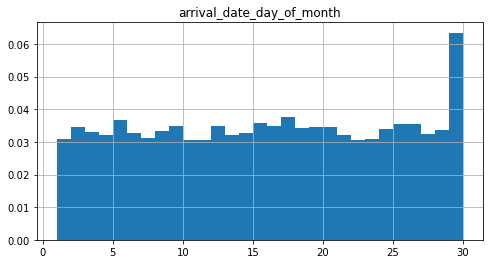

In [10]:
# Code Part C #1 here
#initializing figure
my_bin = range(1,31,1)
fig, ax = plt.subplots(figsize = (8,4))
dfHotel.hist(column = 'arrival_date_day_of_month', ax=ax, bins = my_bin, density = True)   

***Comment on histogram shape and advice in this cell.***

ANS: The histogram shape is definitely skewed slightly left. It is mostly uniform throughout the month, although the last days of the month make an outlier for arrivals, making the graph slightly skewed. I would advise to have a significanty larger amount of staff on deck for the last couple days of the month, as that is when the majority of arrivals occur.

***2] (8 points) Give a 5-number summary and box-and-whisker plot for the week number of year for arrival date and advise on what you find.*** 

In [11]:
# put your code for Part C, #2 (5-number summary) in this cell
dfHotel['arrival_date_week_number'].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

<AxesSubplot:>

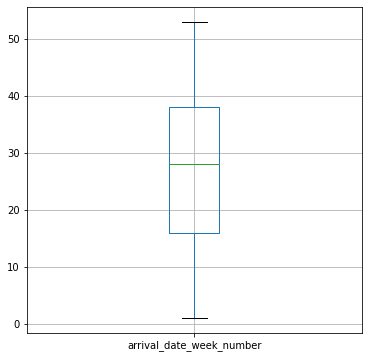

In [12]:
# put your code for Part C, #2 (box-and-whisker plot) in this cell
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
dfHotel.boxplot(column = 'arrival_date_week_number', ax=ax)

***Put your advice for week number of year for arrival date here.***

ANS: This graph appears to be slightly left skewed. As we can notice, the median is 28, but the mode (from above) is 33, meaning that this is the most common week of arrival. It also seems that most customers come in between 16th and the 38th week (q1, q3), so upping staff during these weeks would be a great idea as these are the busiest times of year. 

# Part D
***

Now it is requested that you describe your findings concerning the lead time for hotel reservations.

***1] (2 points) Create a $\color{red}{\text{frequency}}$ histogram of `lead_time`***

array([<AxesSubplot:title={'center':'lead_time'}>], dtype=object)

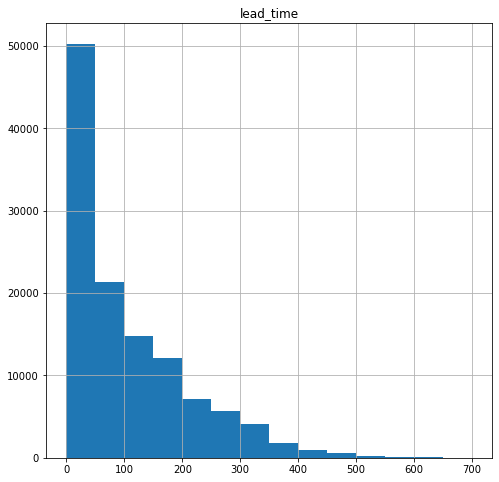

In [13]:
# Code here for your answer to Part D, #1
fig, ax = plt.subplots(figsize=(8,8))
my_bins = range(0,737, 50)
dfHotel.hist(column = 'lead_time', ax=ax, bins = my_bins)

***2] (2 points) What shape is the histogram; right skew, left skew, symmetric, uniform,... and what does the histogram shape indicate about the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.?***


Answer to Part D #2 here: The historgram, when including all of the data values (min =0, max = 737) is skewed very far right. The shape indicates that most people have their lead time anywhere from 0-200 days, with the vast majority of those being in the first 50 days. This indicates that the majority of people book their hotels within 50 days of their arrival.


***3] (2 points) What is the average (mean) lead time for all hotels?***

In [14]:
# Code your answer for Part D #3 here.
leadMean = dfHotel['lead_time'].mean()
print("The average lead time for all hotels is", leadMean, "days.")

The average lead time for all hotels is 104.01141636652986 days.


# Problem 2
***

For Problem 2 we are looking at the data from a study investigating school childrens intelligence. The data consists of 1500 participants and some of their data.

# Part A

***1] (1 point) Read in the csv file, "foot_smart.csv".***

Create a data frame called FootIQ and take a look at it.

In [15]:
# Read in the file and look at it here:
dfFootIQ = pd.read_csv('foot_smart.csv')
dfFootIQ.describe()
dfFootIQ.head(10)

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500K
1,6.76,7,0,21.3,West,500K
2,6.96,7,1,22.2,East,500K
3,7.86,8,1,25.3,East,100K
4,8.17,9,0,23.9,East,100K
5,7.00,8,0,22.5,East,1K
6,2.69,3,0,9.0,South,10K
7,5.47,6,1,16.5,South,1K
8,7.35,8,0,24.3,South,500K
9,6.61,7,1,20.8,East,1M


# Description of this data Set

This is a data set of 1500 participants. The participants are all children from 7 different schools. 

***foot_length:*** This is the length of the students foot in inches.

***shoe_size:*** This is the size of the shoe worn by the student.

***sex:*** This is the sex of the student: 0 female, 1 male.

***IQ:*** This is a measure of intelligence as measured on a standard exam, scaled from 0 to 35.

***US_section:*** This is the section of the U.S. that the student comes from.

***city_size:*** This is the approximate size of the city (in thousands) from which the student came from.

***2] (4 points) Clean the data***

Notice that `city_size` has data entered as '100K' for 100,000 and 1M for 1,000,000.

Clean this column so that it holds integers such as 100000 and 1000000 instead of 100K and 1M. 

In [16]:
#Code here for #2 and cleaning the data
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('K','000')
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('M','000000')
dfFootIQ['city_size'] = dfFootIQ['city_size'].astype(int)
dfFootIQ.head(10)

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500000
1,6.76,7,0,21.3,West,500000
2,6.96,7,1,22.2,East,500000
3,7.86,8,1,25.3,East,100000
4,8.17,9,0,23.9,East,100000
5,7.00,8,0,22.5,East,1000
6,2.69,3,0,9.0,South,10000
7,5.47,6,1,16.5,South,1000
8,7.35,8,0,24.3,South,500000
9,6.61,7,1,20.8,East,1000000


# Part B
***

***Suppose we were to make a scatterplot for foot length and city size (`foot_length` and `city_size`).***

***Note (i)*** The scatter plot has discrete values on the y-axis which makes the 'scatter plot' look like lines.

***Note (ii)*** There is no discernible pattern. The city's of various sizes (on the y-axis) contain students with shoe sizes (on the x-axis) all across the shoe-size spectrum. Meaning students of a particular shoe size do not tend to congregate in citys  of a particular size.

This seems to be common sense; for instance, there is no reason why every student of shoe size 7 would come from a city of size 500,000.

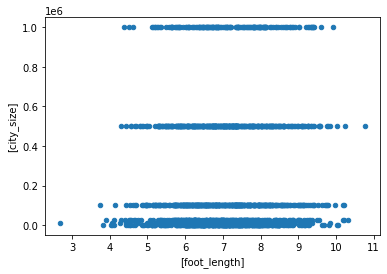

In [17]:
# Uncomment the code below and run it.
ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['city_size'])

***Make two scatterplots:***

   1] ***(2 points)*** A scatterplot for shoe_size and IQ

   2] ***(2 points)*** A scatterplot for foot_length and IQ

Note: these two scatterplots should reveal the same thing since shoe size and foot lenght are really the same thing. The scatterplots will look different though since shoe size is discrete and foot length is continuous.

3] ***(1 point)*** Explain your findings. Either explain why no pattern is found, or if you detect a pattern, then explain why such a pattern exists between shoe size and intelligence.

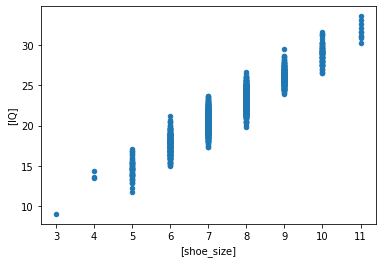

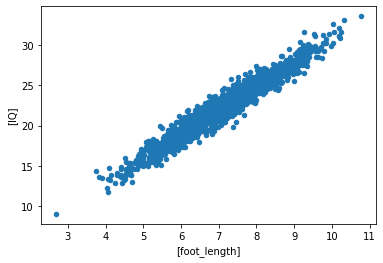

In [18]:
# Code your scatterplots for Part B here
ax2 = dfFootIQ.plot.scatter(x=['shoe_size'], y=['IQ'])
ax3 = dfFootIQ.plot.scatter(x=['foot_length'], y=['IQ'])

***Explain your scatterplot findings for Part B here:***
Very interestingly, it seems that there actually is a correlation with shoe size/foot length and IQ. Although there is overlap in IQ from different shoe sizes and foot length, it seems that both (we are essentially measuring the same thing) indicate a higher IQ comes with a larger foot/shoe size.

# Problem 3
***

# Part A
The mean of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the mean shoe size for the dfFootIQ data


In [19]:
# Uncomment the code below and run it
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())

The mean shoe size is  7.556666666666667


Now, suppose you add 2 to each shoe size in the data set. How will the mean change?

In [20]:
# Uncomment the code below and run it.
print("The mean shoe size with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).mean())

The mean shoe size with 2 added to each entry is  9.556666666666667


***(4 points)*** It appears that the mean simply increases by 2. Does adding 'a' to each data point simply increase the mean by 'a'? ***Prove it.***

Recall the formula for mean:

$$\bar{x} = \frac{1}{n} \displaystyle\sum_{k=1}^n x_k$$


***Written (LaTeX) proof for part A goes here:***

Adding int 'a' to both sides of the equation$$\bar{x} + a = \frac{1}{n}\sum_{k=1}^n x_{k} + a$$ 
Seperating the addition to two seperate summations$$=\frac{1}{n}\cdot(\sum_{k=1}^nx_{k} + \sum_{k=1}^n a)$$
The summation of a constant is simply n times the constant$$=\frac{1}{n}\cdot(\sum_{k=1}^nx_{k} + a\cdot n)$$
Multiplying by 1 div n$$=\frac{\sum_{k=1}^nx_{k}}{n} + a$$
Applying the formula for mean to summation equation$$=\bar{x} + a$$

When adding a value to the mean, we were able to show the values are equal on the LHS and RHS, and therefore a mean is simply added by the number which is being added to the rest of the data set. QED

# Part B
The standard deviation of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the standard deviation for 'shoe size' in the dfFootIQ data.

In [21]:
# Uncomment the code below and run it.
print("Standard deviation for shoe size is ", (dfFootIQ["shoe_size"]).std())

Standard deviation for shoe size is  1.224113771362388


Now, suppose we add 2 to each shoe sizein the data set. How will the standard deviation change?

In [22]:
# Uncomment the code below and run it.
print("The standard deviation with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).std())


The standard deviation with 2 added to each entry is  1.224113771362388


***(4 points)*** It appears as if the standard deviation doesn't change at all after the addition of 2 to each data point. Is it always true that adding 'a' to each data point does not change the standard deviation? ***Prove it.***

Recall the formula for standard deviation:

$$s = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} $$


***Proof for part B goes here:***

Adding a to each value in summation, while also converting the mean to be consistent with above proof
$$s + a = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( (x_k + a) - (\bar{x} + a)\right)^2} $$
Distributing the negative inside parantheses$$s + a = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k + a - \bar{x} - a\right)^2} $$
Cancelling out the a variable$$s + a = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} $$

QED. We can see that adding a number to all values of a dataset results in the same standard deviation. This is because deviation is simply measuring how far apart the values are from each other, so adding a value to all data will shift the mean up, but the differences of values remains the same, so std dev remains the same

# Part C
Suppose each data point in `shoe_size` were to be multiplied by 5.

In [23]:
# Uncomment the code below and run it.
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())
print("The mean after each shoe size is multiplied by 5 is  ", (dfFootIQ["shoe_size"]*5).mean())

The mean shoe size is  7.556666666666667
The mean after each shoe size is multiplied by 5 is   37.78333333333333


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

***Proof for part C goes Here:***

Formula for mean$$\bar{x} = \frac{1}{n}\cdot\sum_{k=1}^nx_{k}$$
Multiplying both sides by a (all data is multiplied by a)$$\bar{x}\cdot a = \frac{1}{n}\cdot\sum_{k=1}^nx_{k}\cdot a$$
Using summation rules to pull a to the outside$$= a\cdot\frac{1}{n}\cdot\sum_{k=1}^nx_{k}$$
Using formula for mean to reduce statement to x bar$$a\cdot\bar{x}$$

QED. As you can see, multiplying a constant to all values in a data set will simply multiply the mean by that constant as well

# Part D

Again, suppose each data point in `shoe_size` were to be multiplied by 5.

In [24]:
# Uncomment the code below and run it. 

print("The shoe size standard deviation is ", (dfFootIQ["shoe_size"]).std())
print("The shoe size standard deviation after multiplying each point by 5 is ", (dfFootIQ["shoe_size"]*5).std())



The shoe size standard deviation is  1.224113771362388
The shoe size standard deviation after multiplying each point by 5 is  6.120568856811966


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

***Proof for part D goes here: ***

Formula for std dev$$s = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} $$
Multiplying the values, and mean by ratio a$$s\cdot a = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k\cdot a - \bar{x} \cdot a\right)^2} $$
Pulling the a out of the subtraction$$=\sqrt{\frac{1}{n-1} \sum_{k=1}^n \left(a\cdot(x_k - \bar{x}\right))^2} $$
Pulling the a and squaring according to the laws of exponents(power of product)$$=\sqrt{\frac{1}{n-1} \sum_{k=1}^n a^2\left(x_k - \bar{x}\right)^2} $$
Pulling the a out of summation (constant summation rule)$$=\sqrt{\frac{a^2}{n-1} \sum_{k=1}^n \left(x_k - \bar{x}\right)^2} $$
square rooting the a, placing outside the sqrt$$=a\cdot\sqrt{\frac{1}{n-1} \sum_{k=1}^n \left(x_k - \bar{x}\right)^2} $$
Applying the formula for std dev$$a\cdot s$$

QED. As shown above, when all the data is multiplied by a constant a, the std deviation is also multiplied by constant a.